In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline

In [2]:
cols = [
    'id',
    'host_id',
    'zipcode',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'bed_type',
    'price',
    'number_of_reviews',
    'review_scores_rating',
    'host_listing_count',
    'availability_30',
    'minimum_nights',
    'bathrooms'
]

file_data = pd.read_csv('dataList.csv', usecols=cols)

In [3]:
file_data.head(10)

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022-4175,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$160.00,3.0,21.0,62.0,86.0,1.0
1,1846722,2631556,NaN,Apartment,Entire home/apt,10,1.0,3.0,3.0,Real Bed,$105.00,1.0,28.0,22.0,85.0,2.0
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,$58.00,3.0,4.0,35.0,98.0,4.0
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$185.00,10.0,1.0,26.0,96.0,1.0
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,$195.00,1.0,30.0,1.0,100.0,1.0
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,$165.00,2.0,11.0,16.0,96.0,2.0
6,4832596,4148973,11207,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,$80.00,1.0,29.0,0.0,NaN,1.0
7,2562510,13119459,10013,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,$120.00,2.0,5.0,0.0,NaN,1.0
8,3005360,4421803,10003,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,$150.00,1.0,30.0,14.0,96.0,4.0
9,2431607,4973668,11221,Apartment,Shared room,2,1.0,1.0,1.0,Real Bed,$40.00,4.0,0.0,10.0,94.0,4.0


In [5]:
len(file_data['zipcode'][file_data.zipcode.isnull()])

28

In [6]:
for colums in file_data.columns:
    print (colums + ', Number of Missing Values:', len(file_data[colums][file_data[colums].isnull()]))

id, Number of Missing Values: 0
host_id, Number of Missing Values: 0
zipcode, Number of Missing Values: 28
property_type, Number of Missing Values: 3
room_type, Number of Missing Values: 0
accommodates, Number of Missing Values: 0
bathrooms, Number of Missing Values: 138
bedrooms, Number of Missing Values: 44
beds, Number of Missing Values: 27
bed_type, Number of Missing Values: 1
price, Number of Missing Values: 1
minimum_nights, Number of Missing Values: 1
availability_30, Number of Missing Values: 1
number_of_reviews, Number of Missing Values: 1
review_scores_rating, Number of Missing Values: 2641
host_listing_count, Number of Missing Values: 1


In [7]:

original = len(file_data)
file_data = file_data.dropna(how='any', subset=['zipcode', 'property_type', 'bedrooms', 'beds', 'bathrooms'])
print('Number of NaN values removed:', original - len(file_data))

Number of NaN values removed: 212


In [8]:
file_data['price'] = (file_data['price'].str.replace(r'[^-+\d.]', '').astype(float))

In [9]:
print ('Number of Accommodates 0:', len(file_data[file_data['accommodates'] == 0]))
print ('Number of Bedrooms 0:', len(file_data[file_data['bedrooms'] == 0]))
print ('Number of Beds 0:', len(file_data[file_data['beds'] == 0]))
print ('Number of Listings with Price $0.00:', len(file_data[file_data['price'] == 0.00]))

file_data = file_data[file_data['accommodates'] != 0]
file_data = file_data[file_data['bedrooms'] != 0]
file_data = file_data[file_data['beds'] != 0]
file_data = file_data[file_data['price'] != 0.00]


Number of Accommodates 0: 0
Number of Bedrooms 0: 687
Number of Beds 0: 0
Number of Listings with Price $0.00: 0


In [10]:
file_data['zipcode'] = file_data['zipcode'].str.replace(r'-\d+', '')

In [12]:
file_data.head()

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,160.0,3.0,21.0,62.0,86.0,1.0
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,58.0,3.0,4.0,35.0,98.0,4.0
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,185.0,10.0,1.0,26.0,96.0,1.0
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,195.0,1.0,30.0,1.0,100.0,1.0
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,165.0,2.0,11.0,16.0,96.0,2.0


In [13]:
print('Number of missing review scores ratings:', len(file_data['review_scores_rating'][file_data['review_scores_rating'].isnull()]))

Number of missing review scores ratings: 2374


In [14]:
print('Number of Unique Accomodation: ', np.unique(file_data['accommodates']))
for unique_accomodation in range(1, 17):
    print('Accommodation {}:'.format(unique_accomodation), len(file_data[file_data['accommodates'] == unique_accomodation]))

Number of Unique Accomodation:  [ 1  2  3  4  5  6  7  8  9 10 11 12 14 16]
Accommodation 1: 824
Accommodation 2: 3578
Accommodation 3: 925
Accommodation 4: 1263
Accommodation 5: 319
Accommodation 6: 400
Accommodation 7: 61
Accommodation 8: 113
Accommodation 9: 17
Accommodation 10: 39
Accommodation 11: 5
Accommodation 12: 21
Accommodation 13: 0
Accommodation 14: 3
Accommodation 15: 0
Accommodation 16: 22


In [15]:
file_data.groupby('accommodates').agg('count')['id']

accommodates
1      824
2     3578
3      925
4     1263
5      319
6      400
7       61
8      113
9       17
10      39
11       5
12      21
14       3
16      22
Name: id, dtype: int64

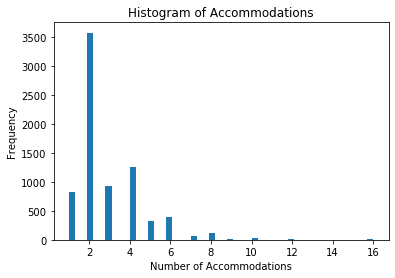

In [16]:
plt.hist(file_data['accommodates'], bins=50)
plt.title("Histogram of Accommodations")
plt.xlabel("Number of Accommodations")
plt.ylabel("Frequency")
plt.show()

In [17]:
print('Number of Unique Beds: ', np.unique(file_data['beds']))
for unique_beds in range(1, 17):
    print('Beds {}:'.format(unique_beds), len(file_data[file_data['beds'] == unique_beds]))

Number of Unique Beds:  [ 1.  2.  3.  4.  5.  6.  7.  8. 10. 12. 14. 16.]
Beds 1: 4958
Beds 2: 1710
Beds 3: 569
Beds 4: 185
Beds 5: 89
Beds 6: 38
Beds 7: 16
Beds 8: 6
Beds 9: 0
Beds 10: 4
Beds 11: 0
Beds 12: 4
Beds 13: 0
Beds 14: 2
Beds 15: 0
Beds 16: 9


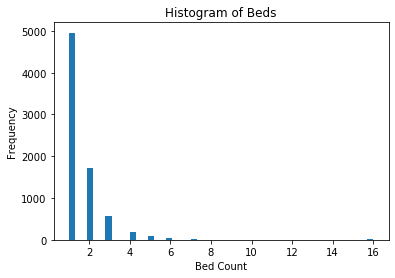

In [19]:
plt.hist(file_data['beds'], bins=50)
plt.title("Histogram of Beds")
plt.xlabel("Bed Count")
plt.ylabel("Frequency")
plt.show()

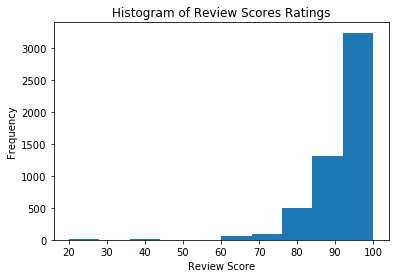

In [20]:
plt.hist(file_data['review_scores_rating'][~file_data['review_scores_rating'].isnull()])
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

In [21]:
idx_vals = file_data['review_scores_rating'][file_data['number_of_reviews'] == 0].index.values.tolist()
file_data.loc[idx_vals, 'review_scores_rating'] = file_data['review_scores_rating'][file_data['number_of_reviews'] == 0].replace(np.nan, 'No Reviews')

In [23]:
file_data.head(10)

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,160.0,3.0,21.0,62.0,86,1.0
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,58.0,3.0,4.0,35.0,98,4.0
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,185.0,10.0,1.0,26.0,96,1.0
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,195.0,1.0,30.0,1.0,100,1.0
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,165.0,2.0,11.0,16.0,96,2.0
6,4832596,4148973,11207,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,80.0,1.0,29.0,0.0,No Reviews,1.0
7,2562510,13119459,10013,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,120.0,2.0,5.0,0.0,No Reviews,1.0
8,3005360,4421803,10003,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,150.0,1.0,30.0,14.0,96,4.0
9,2431607,4973668,11221,Apartment,Shared room,2,1.0,1.0,1.0,Real Bed,40.0,4.0,0.0,10.0,94,4.0
11,4833061,24879430,11221,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,75.0,1.0,2.0,0.0,No Reviews,1.0


In [24]:
file_data = file_data[~file_data['review_scores_rating'].isnull()]

In [25]:
len(file_data)

7504

In [26]:
file_data = file_data[file_data['zipcode'].map(len) == 5]

In [27]:
len(file_data)

7504

In [28]:
def convert_scores_buckets(val):
    if val == 'No Reviews':
        return 'No Reviews'
    elif val >= 95.0:
        return '95-100'
    elif val >= 90.0 and val < 95.0:
        return '90-94'
    elif val >= 85.0 and val < 90.0:
        return '85-89'
    elif val >= 80.0 and val < 85.0:
        return '80-84'
    elif val >= 70.0 and val < 80.0:
        return '70-79'
    elif val >= 60.0 and val < 70.0:
        return '60-69'
    elif val >= 50.0 and val < 60.0:
        return '50-59'
    elif val >= 40.0 and val < 50.0:
        return '40-49'
    elif val >= 30.0 and val < 40.0:
        return '30-39'
    elif val >= 20.0 and val < 30.0:
        return '20-29'
    elif val >= 10.0 and val < 20.0:
        return '10-19'
    elif val < 10.0:
        return '0-9'

In [29]:
file_data['review_scores_rating'] = file_data['review_scores_rating'].apply(convert_scores_buckets)
print ('Unique Values in the Column:', np.unique(file_data['review_scores_rating']))

Unique Values in the Column: ['20-29' '40-49' '50-59' '60-69' '70-79' '80-84' '85-89' '90-94' '95-100'
 'No Reviews']


In [31]:
file_data.head(10)

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,160.0,3.0,21.0,62.0,85-89,1.0
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,58.0,3.0,4.0,35.0,95-100,4.0
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,185.0,10.0,1.0,26.0,95-100,1.0
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,195.0,1.0,30.0,1.0,95-100,1.0
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,165.0,2.0,11.0,16.0,95-100,2.0
6,4832596,4148973,11207,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,80.0,1.0,29.0,0.0,No Reviews,1.0
7,2562510,13119459,10013,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,120.0,2.0,5.0,0.0,No Reviews,1.0
8,3005360,4421803,10003,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,150.0,1.0,30.0,14.0,95-100,4.0
9,2431607,4973668,11221,Apartment,Shared room,2,1.0,1.0,1.0,Real Bed,40.0,4.0,0.0,10.0,90-94,4.0
11,4833061,24879430,11221,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,75.0,1.0,2.0,0.0,No Reviews,1.0


In [32]:
print ('Number of remaining records:', len(file_data))

Number of remaining records: 7504


In [34]:
#encode categorical variables
property_dummies = pd.get_dummies(file_data['property_type'])
room_dummies = pd.get_dummies(file_data['room_type'])
bed_dummies = pd.get_dummies(file_data['bed_type'])

In [36]:
#replace old col with new hot encoded ones
data_frame = pd.concat((file_data.drop(['property_type', 'room_type', 'bed_type'], axis=1), \
     property_dummies.astype(int), room_dummies.astype(int), bed_dummies.astype(int)), \
     axis=1)
print ('Number of Columns:', len(data_frame.columns))

Number of Columns: 32


In [37]:
#move target predicted price to the end of the data frame
cols = list(data_frame.columns.values)
idx = cols.index('price')
rearrange_cols = cols[:idx] + cols[idx+1:] + [cols[idx]]
data_frame = data_frame[rearrange_cols]

In [38]:
#convert non categorical variable to float and normalize
def normalize(col):
    mean = np.mean(col)
    std = np.std(col)
    return col.apply(lambda x: (x - mean) / std)
non_categorical_variable = ['accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'host_listing_count', 'availability_30', 'minimum_nights', 'bathrooms']
for col in non_categorical_variable:
    data_frame[col] = data_frame[col].astype(float)
    data_frame[col] = normalize(data_frame[col])

In [39]:
data_frame.head()


,id,host_id,zipcode,accommodates,bathrooms,bedrooms,beds,minimum_nights,availability_30,number_of_reviews,...,Treehouse,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,price
0,1069266,5867023,10022,-0.519540,-0.337034,-0.411701,-0.506855,0.173673,0.376770,2.499090,...,0,1,0,0,0,0,0,0,1,160.0
2,2061725,4601412,11221,-0.519540,-0.337034,-0.411701,0.381592,0.173673,-0.982847,1.169291,...,0,0,1,0,0,0,0,0,1,58.0
3,44974,198425,10011,-0.519540,-0.337034,-0.411701,-0.506855,2.947379,-1.222780,0.726024,...,0,1,0,0,0,0,0,0,1,185.0
4,4701675,22590025,10011,-0.519540,-0.337034,-0.411701,0.381592,-0.618814,1.096568,-0.505271,...,0,1,0,0,0,0,0,0,1,195.0
5,68914,343302,11231,1.671625,-0.337034,1.235103,1.270038,-0.222570,-0.423005,0.233506,...,0,1,0,0,0,0,0,0,1,165.0


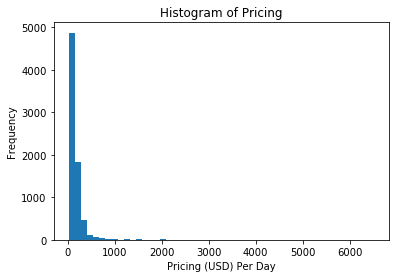

In [41]:
#visualize distribution of price
plt.hist(data_frame['price'], bins=50)
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

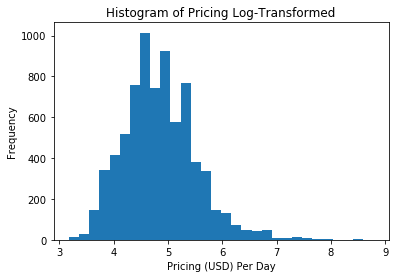

In [42]:
# Histogram of Pricing indicates Pricing is pretty skewed
# log transform the response 'price'
data_frame['price_log'] = data_frame['price'].apply(lambda x: math.log(x))
plt.hist(data_frame['price_log'], bins=30)
plt.title("Histogram of Pricing Log-Transformed")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

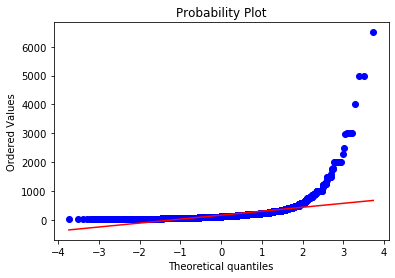

In [43]:
# qq plot for log-transformed pricing, showing the similarity of normal distribution 
# Blue line is for real data. Red line is for normal distribution
stats.probplot(data_frame['price'], dist="norm", plot=pylab)
pylab.show()

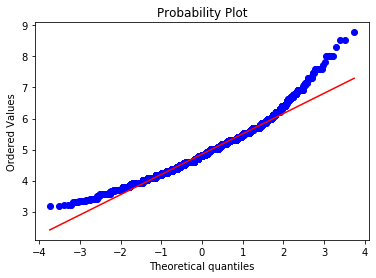

In [44]:
# qq plot for log-transformed pricing
stats.probplot(data_frame['price_log'], dist="norm", plot=pylab)
pylab.show()
# Closer to normal distribution

In [45]:
data_frame.to_csv('clean_data_output.csv')